In [1]:
%matplotlib inline
from matplotlib import pyplot
import math
import numpy
import pandas

In [2]:
hetero=False
inputfile1="spec.csv"

#hetero=True
#inputfile1="spec1.csv"
#inputfile2="spec2.csv"

dynamic=True
num_contour=16

In [3]:
def specread(inputfile):
 spec=pandas.read_csv(inputfile,header=0,index_col=0)
 spec=spec.T
 if dynamic:
  spec=spec-spec.mean()
 return spec

In [4]:
# file read
spec1=specread(inputfile1)
if hetero==False:
 inputfile2=inputfile1
spec2=specread(inputfile2)
if len(spec1)!=len(spec2):
 raise Exception('data mismatching')

In [5]:
def contourplot(spec):
 x=spec.columns[0:].astype(float)
 y=spec.index[0:].astype(float)
 z=spec.values
 zmax=numpy.absolute(z).max()
 pyplot.figure(figsize=(4,4))
 pyplot.contour(x,y,z,num_contour,cmap='bwr',vmin=-1*zmax,vmax=zmax)
 #pyplot.pcolormesh(x,y,z,cmap='jet',vmin=-1*zmax,vmax=zmax)
 #pyplot.xlim(max(x),min(x))
 #pyplot.ylim(max(y),min(y))

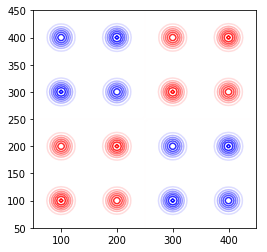

In [6]:
# synchronous correlation
sync=pandas.DataFrame(spec1.values.T@spec2.values/(len(spec1)-1))
sync.index=spec1.columns
sync.columns=spec2.columns
sync=sync.T
contourplot(sync)
#sync.to_csv(inputfile1[:len(inputfile1)-4]+'_sync.csv')

In [7]:
# Hilbert-Noda transformation matrix
noda=numpy.zeros((len(spec1),len(spec1)))
for i in range(len(spec1)):
 for j in range(len(spec1)):
  if i!=j:
   noda[i,j]=1/math.pi/(j-i)

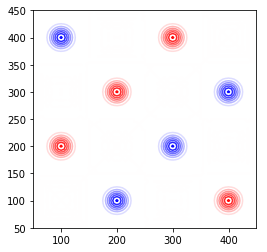

In [8]:
# asynchronouse correlation
asyn=pandas.DataFrame(spec1.values.T@noda@spec2.values/(len(spec1)-1))
asyn.index=spec1.columns
asyn.columns=spec2.columns
asyn=asyn.T
contourplot(asyn)
#asyn.to_csv(inputfile1[:len(inputfile1)-4]+'_async.csv')